# Challenge 05

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importamos el csv
df = pd.read_csv("UML_2024.csv")
df

,cid,Molecular_weight,LogP,Number_of_HBA_1,Number_of_HBA_2,Number_of_HBD_1,Number_of_HBD_2,Number_of_acidic_groups,Number_of_aliphatic_OH_groups,Number_of_basic_groups,...,Number_of_OSO_groups,Number_of_SO2_groups,PolarSurfaceArea,Geometrical_diameter,Geometrical_radius,Geometrical_shape_coefficient,Kier_shape_1,Kier_shape_2,Zagreb_group_index_1,Zagreb_group_index_2
0,1046,123.114998,1.0732,9,4,1,0,0,0,0,...,0,0,68.87,7.031056,1.007808,5.976582,7.111111,3.239669,63,63
1,124704,165.155998,1.5166,13,6,2,0,0,0,2,...,0,0,107.25,9.169663,1.003795,8.134998,10.083333,4.888889,85,84
2,171646,265.053997,-1.7651,11,3,1,0,1,0,0,...,0,0,59.86,7.029373,0.161433,42.543630,11.000000,4.792899,84,81
3,171647,138.149998,1.2309,11,3,1,0,0,0,0,...,0,0,59.86,7.067147,1.006808,6.019361,8.100000,3.408284,84,81
4,181450,157.559997,1.6036,8,4,1,0,0,0,0,...,0,0,68.87,7.646398,1.007958,6.586025,8.100000,3.408284,64,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,53393977,396.438991,8.6718,30,6,0,0,0,0,0,...,0,0,71.06,16.429361,1.082601,14.175829,25.262222,13.420118,260,248
296,51136451,356.373991,5.9132,26,6,2,2,0,0,0,...,0,0,93.06,11.376300,0.969437,10.734955,22.290809,9.972299,226,223
297,46946664,410.465990,8.5972,32,6,1,1,0,0,0,...,0,0,82.06,16.457952,0.969098,15.982759,26.253902,14.210000,276,272
298,46898924,425.412990,6.8134,28,8,1,2,1,0,0,...,0,0,122.19,15.917241,0.970202,15.406104,27.246094,14.302721,258,261


In [ ]:
# Verificamos que no tenga nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

In [ ]:
# eliminamos Geometrical_shape_coefficient
df = df.drop('Geometrical_shape_coefficient', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cid                            300 non-null    int64  
 1   Molecular_weight               300 non-null    float64
 2   LogP                           300 non-null    float64
 3   Number_of_HBA_1                300 non-null    int64  
 4   Number_of_HBA_2                300 non-null    int64  
 5   Number_of_HBD_1                300 non-null    int64  
 6   Number_of_HBD_2                300 non-null    int64  
 7   Number_of_acidic_groups        300 non-null    int64  
 8   Number_of_aliphatic_OH_groups  300 non-null    int64  
 9   Number_of_basic_groups         300 non-null    int64  
 10  Fraction_of_rotatable_bonds    300 non-null    float64
 11  Number_of_heavy_bonds          300 non-null    int64  
 12  Number_of_heterocycles         300 non-null    int

1. Emplea modelos no supervisados (Kmeans, DBSCAN, PCA, etc) y figuras (elbow plot, diagrama de silhouette) según convenga.

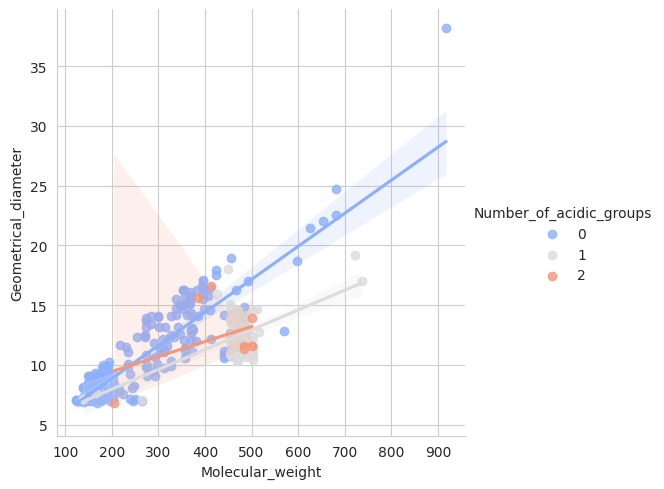

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x='Molecular_weight', y='Geometrical_diameter', data=df, hue='Number_of_acidic_groups', palette='coolwarm', height=5, aspect=1, fit_reg=True)

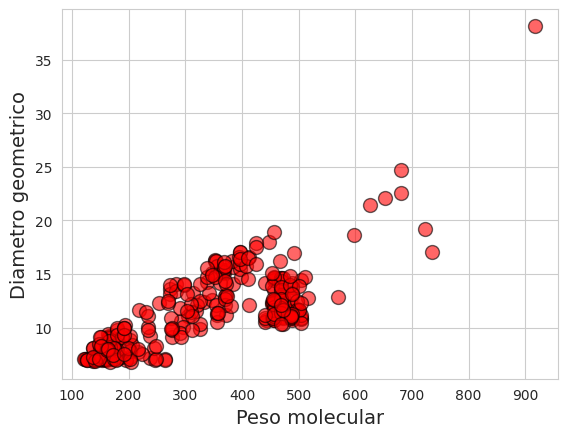

In [ ]:
# Existe una correlacion entre el meso molecular y diametro geometrico
plt.xlabel ("Peso molecular",fontsize=14)
plt.ylabel ("Diametro geometrico",fontsize=14)
plt.scatter(df['Molecular_weight'],df['Geometrical_diameter'],color='red',edgecolor='k',alpha=0.6, s=100)

In [ ]:
# importamos k means
from sklearn.cluster import KMeans

In [ ]:
# k means con 3 clusteres
kmeans = KMeans(n_clusters=3,verbose=0,tol=1e-3,max_iter=300,n_init=20)

In [ ]:
# ajustando el modelo escepto la etiqueta 'Number_of_acidic_groups'
kmeans.fit(df.drop('Number_of_acidic_groups',axis=1))

KMeans(n_clusters=3, n_init=20, tol=0.001)

In [ ]:
# los centroides del grupo
clus_cent=kmeans.cluster_centers_
clus_cent

array([[ 6.83264214e+07,  3.20745703e+02,  7.31190921e+00,
         2.83370787e+01,  4.74157303e+00,  1.42696629e+00,
         1.13483146e+00,  3.93258427e-01,  1.23595506e-01,
         1.99588841e-01,  2.38089888e+01,  5.05617978e-01,
         0.00000000e+00,  1.13338939e+02,  4.64382022e+01,
         2.13483146e-01,  0.00000000e+00,  3.37078652e-02,
         6.74157303e-02,  1.12359551e-02,  1.01123596e-01,
         1.73033708e+00,  3.02247191e+00,  1.12359551e-02,
         6.74157303e-02,  4.75730337e+01,  1.56125113e-17,
         0.00000000e+00,  0.00000000e+00,  4.49438202e-02,
         7.90168539e+01,  1.14036883e+01,  9.35342766e-01,
         1.89025063e+01,  8.27933865e+00,  2.44943820e+02,
         2.62460674e+02],
       [ 7.78560658e+06,  3.31090588e+02,  7.82485323e+00,
         2.97688172e+01,  4.33333333e+00,  1.41935484e+00,
         1.59677419e+00,  6.02150538e-01,  1.07526882e-02,
         1.72582210e-01,  2.53978495e+01,  3.17204301e-01,
         0.00000000e+00,  1.19

In [ ]:
# Eriquetas
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [ ]:
df1 = df
df1['Cluster'] = kmeans.labels_
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df1['Cluster'],kmeans.labels_))
print(classification_report(df1['Cluster'],kmeans.labels_))

[[ 89   0   0]
 [  0 186   0]
 [  0   0  25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       186
           2       1.00      1.00      1.00        25

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<ipython-input-61-3b29098eb8a9>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
<ipython-input-61-3b29098eb8a9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
<ipython-input-61-3b29098eb8a9>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


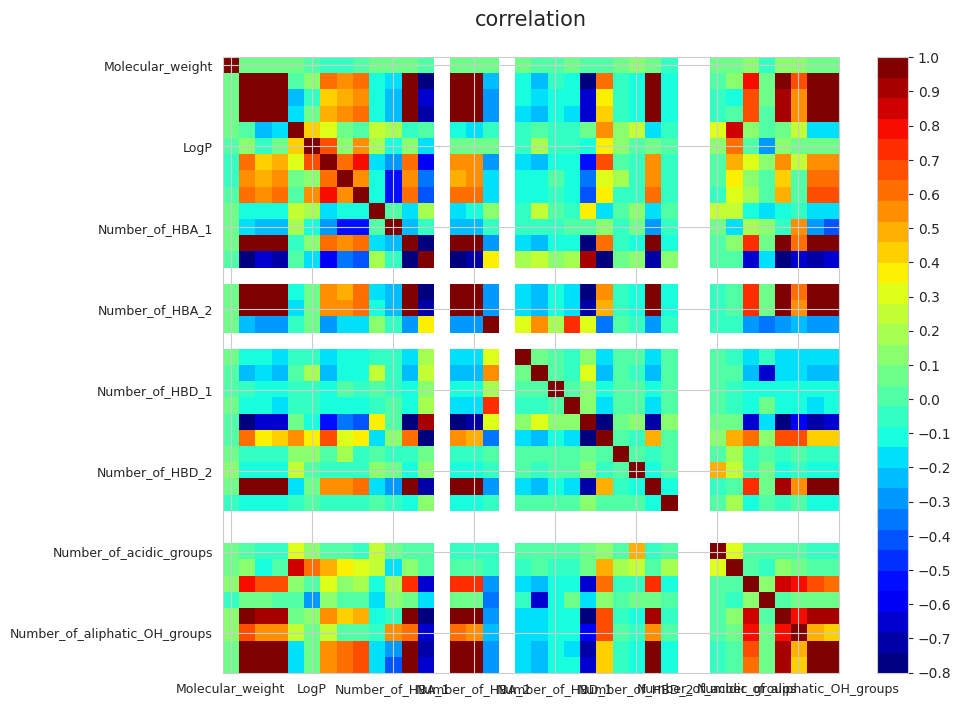

In [ ]:
# Viendo la correlacion
from sklearn.decomposition import PCA
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

2. ¿Cuántas dimensiones son requeridas para preservar el 95% de la varianza?

In [ ]:
from sklearn.preprocessing import StandardScaler
# estandarizacion de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
# ajuste del modelo de pca
pca = PCA()
pca.fit(X_scaled)

PCA()

In [ ]:
# Explicacion de la varianza
explained_variance = pca.explained_variance_ratio_

In [ ]:
# Seleccion de numero de dimensiones
num_components = 0
for i in range(len(explained_variance)):
    if sum(explained_variance[:i+1]) >= 0.95:
        num_components = i + 1
        break
print('La dimensiones necesarias son:',num_components)

La dimensiones necesarias son: 14


3. ¿Cómo usarías KMeans para reducir la dimensionalidad?

In [ ]:
# Aplicando el algoritmo K-means al conjunto de datos original, agrupando los puntos en un número 'k' de clusters,
# haciendo que cada cluster represente una región del espacio original de datos.
# Tambien calculando el centroide de cada cluster. El centroide es el vector promedio de todos los puntos dentro de un cluste,
# y cada centroide representa una nueva dimensión reducida.